In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from main import Surprise
import pandas as pd
import numpy as np

df = pd.read_csv('./data/medicaidtabs.csv')

groups = ['med', 'voter']
rate_keys = ['med_rate', 'voter_rate']
df['med_rate'] = df['med_rate'] / 100
df['voter_rate'] = df['voter_rate'] / 100

surprise = Surprise(
    df=df,
    groups=groups, 
    rate_keys=rate_keys,
)

# Calculate surprise for each group
surprise.calculate()
df

,fips,name,state,med_rate,voter_rate,pop,med_zScore,med_surprise,voter_zScore,voter_surprise
0,1001,Autauga County,Alabama,0.187,0.7266,54571.0,-0.501807,-0.007706,0.366220,0.005628
1,1003,Baldwin County,Alabama,0.164,0.7865,182265.0,-0.888608,-0.024786,0.745865,0.020835
2,1005,Barbour County,Alabama,0.273,0.5702,27457.0,0.944491,0.010279,-0.625040,-0.006811
3,1007,Bibb County,Alabama,0.218,0.8194,22915.0,0.019533,0.000195,0.954384,0.009491
4,1009,Blount County,Alabama,0.184,0.9018,57322.0,-0.552259,-0.008689,1.476634,0.023113
...,...,...,...,...,...,...,...,...,...,...
3147,56037,Sweetwater County,Wyoming,0.150,0.7569,43806.0,-1.124052,-0.015423,0.558261,0.007681
3148,56039,Teton County,Wyoming,0.106,0.3161,21294.0,-1.864018,-0.017817,-2.235520,-0.021341
3149,56041,Uinta County,Wyoming,0.157,0.8106,21118.0,-1.006330,-0.009607,0.898610,0.008582
3150,56043,Washakie County,Wyoming,0.134,0.8136,8533.0,-1.393130,-0.008458,0.917624,0.005576


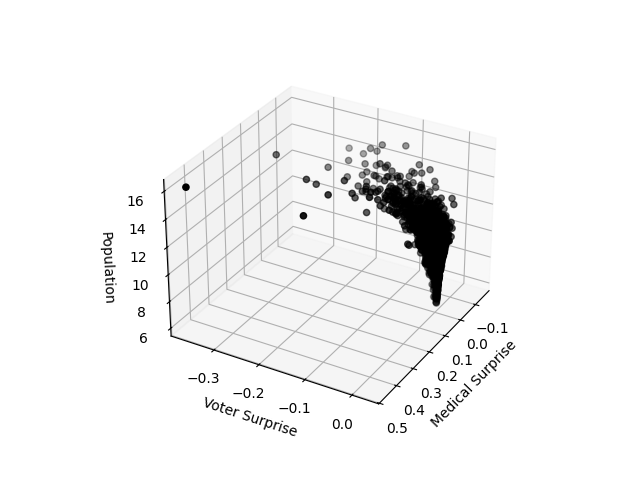

In [10]:
%matplotlib widget  

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import mplcursors  

dx = pd.read_csv('dte.csv')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') 

scatter = ax.scatter(dx['med_s'], dx['voter_s'], dx['population'], color='black', picker=True)

ax.set_xlabel('Medical Surprise')
ax.set_ylabel('Voter Surprise')
ax.set_zlabel('Population')
ax.view_init(elev=30, azim=30)
plt.show()


In [4]:
surprise.funnel_plot('med')

alt.LayerChart(...)

In [5]:
surprise.funnel_plot('voter')

alt.LayerChart(...)